In [240]:
%pylab inline --no-import-all
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn import datasets
from sklearn import linear_model, metrics, preprocessing, cross_validation
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


from matplotlib.colors import ListedColormap
import warnings


kdd = pd.read_csv('/home/AIIDS/kddcup99/kddcup.data_10_percent', header=None)

Populating the interactive namespace from numpy and matplotlib


In [162]:
#df_normal.to_csv("kdd_normal.csv")
#kdd.to_csv("kdd.csv")

In [199]:
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [198]:
df_normal.iloc[271155]

0          0
5          0
11         0
14         0
15         0
16         0
17         0
18         0
30         0
31       255
36         0
41    smurf.
Name: 271155, dtype: object

In [202]:
sc.transform(X.iloc[0:3])

array([[-0.07938513,  1.27097877,  2.361757  ,  0.        , -0.02816628,
        -0.0142292 , -0.01909202, -0.02465069, -0.19969686, -3.37043293,
        -0.15515322],
       [-0.07938513, -0.00731928,  2.361757  ,  0.        , -0.02816628,
        -0.0142292 , -0.01909202, -0.02465069, -0.19969686, -3.21900005,
        -0.15515322],
       [-0.07938513,  0.21182489,  2.361757  ,  0.        , -0.02816628,
        -0.0142292 , -0.01909202, -0.02465069, -0.19969686, -3.06756718,
        -0.15515322]])

In [201]:
X.iloc[0:3]

,0,5,11,14,15,16,17,18,30,31,36
0,0,5450,1,0,0,0,0,0,0.0,9,0.0
1,0,486,1,0,0,0,0,0,0.0,19,0.0
2,0,1337,1,0,0,0,0,0,0.0,29,0.0


In [194]:
mms.transform(X.iloc[0:3])

array([[  0.00000000e+00,   5.45000000e+03,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -2.46000000e+02,   0.00000000e+00],
       [  0.00000000e+00,   4.86000000e+02,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -2.36000000e+02,   0.00000000e+00],
       [  0.00000000e+00,   1.33700000e+03,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -2.26000000e+02,   0.00000000e+00]])

In [196]:
print(mms.transform(X.iloc[0:3]))


[[ 0.          1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.5         0.        ]
 [ 0.          0.17143433  0.          0.          0.          0.          0.
   0.          0.          1.          0.        ]]


In [197]:
print(sc.transform(sc.transform(X.iloc[0:3])))

[[-0.07950785 -0.13214365  6.15448255  0.         -0.07427329 -0.26427982
  -0.61931072 -1.02525835 -1.65454845 -3.55776195 -3.15284043]
 [-0.07950785 -0.13247283  6.15448255  0.         -0.07427329 -0.26427982
  -0.61931072 -1.02525835 -1.65454845 -3.55546876 -3.15284043]
 [-0.07950785 -0.13241639  6.15448255  0.         -0.07427329 -0.26427982
  -0.61931072 -1.02525835 -1.65454845 -3.55317557 -3.15284043]]


df_normalの特徴名(行列は０からスタート、特徴番号参照の際は添字＋１)

0: duration
5: dst_bytes
11: logged_in
14: su_attempted
15: num_root
16: num_file_creations
17: num_shells
18: num_access_files
30: srv_diff_host_rate
31: dst_host_count
36: dst_host_srv_diff_host_rate
41: label

In [243]:
"""
学習用データセットの読み込み
"""
df_normal = kdd[[0, 5, 11, 14, 15, 16, 17, 18, 30, 31, 36, 41]]
kdtoc = df_normal[df_normal.iloc[: , 11] != 'normal.']
df_normal.to_csv("kdd_normal.csv")

#df_normal.columns = [u'dst_bytes', u'logged_in', u'su_attempted', u'num_root', u'num_file_creations', 
#                   u'num_shells', u'num_access_files', u'srv_diff_host_rate', u'dst_host_count', 
#                 u'dst_host_srv_diff_host_rate', u'label']

z = df_normal.iloc[:, 11].values
z = np.where(z == 'normal.', 0, 1)#normal = 0, normal以外 = 1

X = df_normal.iloc[:, [0,1,2,3,4,5,6,7,8,9,10] ]
y = df_normal.iloc[:, 11].values
y = np.where(y == 'normal.', 0, 1)  #クラスラベル

In [245]:
"""
フルデータ（未学習ラベルあり）の読み込み
フルデータの1割とフルデータ全てでの検知を行う
"""

kdd_full = pd.read_csv('/home/AIIDS/kddcup99/kddcup.data', header=None)
df_normal_full = kdd_full[[0, 5, 11, 14, 15, 16, 17, 18, 30, 31, 36, 41]]
kdtoc = df_normal_full[df_normal_full.iloc[: , 11] != 'normal.']

z_full = df_normal_full.iloc[:, 11].values
z_full = np.where(z == 'normal.', 0, 1)#normal = 0, normal以外 = 1

X_full = df_normal_full.iloc[:, [0,1,2,3,4,5,6,7,8,9,10] ]
y_full = df_normal_full.iloc[:, 11].values
y_full = np.where(y_full == 'normal.', 0, 1)  #クラスラベル

/root/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()


In [246]:
"""
フルデータから1割を抽出
"""
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
X, y, test_size = 0.1, random_state = 0)

X_full_test = X_full_test.reset_index(drop=True)

In [247]:
#SGD 標準化

#トレーニングとテストに分割
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.7, random_state = 0)

X_test = X_test.reset_index(drop=True)


#標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


#SGD_std
start = time.time() #処理開始時間

ppnstd = SGDClassifier(eta0 = 10, loss = 'perceptron')
ppnstd.fit(X_train_std, y_train)

y_pred = ppnstd.predict(X_test_std)
#モデルによるラベル分類
#y_test = 正解のラベル

# 経過時間を表示
elapsed_time = time.time()-start
print(f"経過時間：{elapsed_time}")

miss_class = (y_test != y_pred).sum()
accu_class = (accuracy_score(y_test, y_pred))

print('誤分類数： %d個' % miss_class)
print('正解率    : %f' % accu_class)


#誤検知したやつを探す
result = pd.DataFrame(y_pred, columns=['prediction'])
result['correct'] = y_test
result['accuracy'] = y_test == y_pred

f_positives = result[result.iloc[:, 2] == False]
f_positives = f_positives[f_positives.iloc[:, 0] == 1]#誤検知(false positives)

f_negatives = result[result.iloc[:, 2] == False]
f_negatives = f_negatives[f_negatives.iloc[:, 0] == 0]#誤検知(false negatives)

per_fn = len(f_negatives) / miss_class
print('誤検知率 : %f' % per_fn)

経過時間：0.09102058410644531
誤分類数： 12897個
正解率    : 0.962705
誤検知率 : 0.231604


In [248]:
"""
フルデータの1割での検知
データセットは標準化を行なっている
ランダムに予測する
"""

i=0
fn=0
fp=0
correct=0
alltime=0

while i < 10000:
    
    #分類開始#
    start = time.time() #処理開始時間
    random = X_full_test.sample()
    y_pred = ppnstd.predict(sc.transform(random))
    y_correct = y_full_test[random.index]


    if y_pred[0] == 0:
            if y_pred[0] == y_correct:
                correct+=1
            else:
                fn+=1
    else:
        if y_pred[0] == y_correct:
            correct+=1
        else:
            fp+=1
    #分類終了#    
    elapsed_time = time.time()-start
    alltime += elapsed_time
    
    i+=1

SGD_std_ac = (correct/i) *100
SGD_std_fp = (fp/i) *100
SGD_std_fn = (fn/i) *100  
SGD_std_time = (alltime/i) * 1000
    
print(f"False Negative:{SGD_std_fn}")
print(f"False Positive  :{SGD_std_fp}")
print(f"Correct Percentage:{SGD_std_ac}")
print(f"Correct:{correct}")
print(f"Time lapse ave　(ms):{SGD_std_time}")

False Negative:0.77
False Positive  :3.0300000000000002
Correct Percentage:96.2
Correct:9620
Time lapse ave　(ms):1.370295262336731


In [251]:
#SGD　正規化

#トレーニングとテストに分割
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.7, random_state = 0)

X_test = X_test.reset_index(drop=True)

#正規化(normalization)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_norm = mms.transform(X_train)
X_test_norm = mms.transform(X_test)


start = time.time()  #処理開始時間

ppnnorm = SGDClassifier(eta0 = 10, loss = 'perceptron')
ppnnorm.fit(X_train_norm, y_train)

y_pred = ppnnorm.predict(X_test_norm)
#モデルによるラベル分類
#y_test = 正解のラベル

# 経過時間を表示
elapsed_time = time.time()-start
print(f"経過時間：{elapsed_time}")

miss_class = (y_test != y_pred).sum()
accu_class = (accuracy_score(y_test, y_pred))

print('誤分類数： %d個' % miss_class)
print('正解率    : %f' % accu_class)

#誤検知したやつを探す
result = pd.DataFrame(y_pred, columns=['prediction'])
result['correct'] = y_test
result['accuracy'] = y_test == y_pred

f_positives = result[result.iloc[:, 2] == False]
f_positives = f_positives[f_positives.iloc[:, 0] == 1]#誤検知(false positives)

f_negatives = result[result.iloc[:, 2] == False]
f_negatives = f_negatives[f_negatives.iloc[:, 0] == 0]#誤検知(false negatives)

per_fn = len(f_negatives) / miss_class
print('誤検知率 : %f' % per_fn)

経過時間：0.09372901916503906
誤分類数： 20073個
正解率    : 0.941955
誤検知率 : 0.121905


In [252]:
"""SGD_norm
フルデータの1割での検知
データセットは標準化を行なっている
ランダムに予測する
"""

i=0
fn=0
fp=0
correct=0
while i < 10000:
    
    #分類開始#
    start = time.time() #処理開始時間
    random = X_full_test.sample()
    y_pred = ppnnorm.predict(mms.fit_transform(random))
    y_correct = y_full_test[random.index]

    if y_pred[0] == 0:
            if y_pred[0] == y_correct:
                correct+=1
            else:
                fn+=1
    else:
        if y_pred[0] == y_correct:
            correct+=1
        else:
            fp+=1
    #分類終了#    
    elapsed_time = time.time()-start
    alltime += elapsed_time
            
    i+=1

SGD_norm_ac = (correct/i) *100
SGD_norm_fp = (fp/i) *100
SGD_norm_fn = (fn/i) *100  
SGD_norm_time = (alltime/i) * 1000

print(f"False Negative:{SGD_norm_fn}")
print(f"False Positive  :{SGD_norm_fp}")
print(f"Correct Percentage:{SGD_norm_ac}")
print(f"Correct:{correct}")
print(f"Time lapse ave　(ms):{SGD_norm_time}")

False Negative:80.75
False Positive  :0.0
Correct Percentage:19.25
Correct:1925
Time lapse ave　(ms):2.8944828510284424


In [78]:
"""SGD_std
フルデータの全てでの検知
データセットは標準化を行なっている
ランダムに予測する
"""
i=0
fn=0
fp=0
correct=0
while i < 100:
    random = X_fulｌ.sample()
    y_pred = ppnstd.predict(sc.transform(random))
    y_correct = y_full[random.index]

    if y_pred[0] == 0:
            if y_pred[0] == y_correct:
                correct+=1
            else:
                fn+=1
    else:
        if y_pred[0] == y_correct:
            correct+=1
        else:
            fp+=1
            
    i+=1

SGD_std_ac = (correct/i) *100
SGD_std_fp = (fp/i) *100
SGD_std_fn = (fn/i) *100  
    
print(f"False Negative:{SGD_std_fn}")
print(f"False Positive  :{SGD_std_fp}")
print(f"Correct Percentage:{SGD_std_ac}")
print(f"Correct:{correct}")

False Negative:0.0
False Positive  :2.0
Correct Percentage:98.0
Correct:98


In [253]:
#k近傍法, 標準化

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.99, random_state = 0)

X_test = X_test.reset_index(drop=True)


#標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#knn_std
start = time.time() #処理開始時間

knnstd = KNeighborsClassifier(n_neighbors=5, p=2)
knnstd.fit(X_train_std, y_train)

y_pred = knnstd.predict(X_test_std)
#y_pred = モデルによるラベル分類
#y_test = 正解のラベル

# 経過時間を表示
elapsed_time = time.time()-start
print(f"経過時間：{elapsed_time}")

miss_class = (y_test != y_pred).sum()
accu_class = (accuracy_score(y_test, y_pred))

print('誤分類数： %d個' % miss_class)
print('正解率    : %f' % accu_class)

#誤検知したやつを探す
result = pd.DataFrame(y_pred, columns=['prediction'])
result['correct'] = y_test
result['accuracy'] = y_test == y_pred

f_positives = result[result.iloc[:, 2] == False]
f_positives = f_positives[f_positives.iloc[:, 0] == 1]#誤検知(false positives)

f_negatives = result[result.iloc[:, 2] == False]
f_negatives = f_negatives[f_negatives.iloc[:, 0] == 0]#誤検知(false negatives)

per_fn = len(f_negatives) / miss_class
print('誤検知率 : %f' % per_fn)

経過時間：40.68462657928467
誤分類数： 6761個
正解率    : 0.986176
誤検知率 : 0.329093


In [254]:
"""KNN_std
フルデータの1割での検知
データセットは標準化を行なっている
ランダムに予測する
"""

i=0
fn=0
fp=0
correct=0
while i < 10000:
    
    #分類開始#
    start = time.time() #処理開始時間
    random = X_full_test.sample()
    y_pred = knnstd.predict(sc.transform(random))
    y_correct = y_full_test[random.index]

    if y_pred[0] == 0:
            if y_pred[0] == y_correct:
                correct+=1
            else:
                fn+=1
    else:
        if y_pred[0] == y_correct:
            correct+=1
        else:
            fp+=1
    #分類終了#    
    elapsed_time = time.time()-start
    alltime += elapsed_time
            
    i+=1

KNN_std_ac = (correct/i) *100
KNN_std_fp = (fp/i) *100
KNN_std_fn = (fn/i) *100   
KNN_std_time = (alltime/i) * 1000

print(f"False Negative:{KNN_std_fn}")
print(f"False Positive  :{KNN_std_fp}")
print(f"Correct Percentage:{KNN_std_ac}")
print(f"Correct:{correct}")
print(f"Time lapse ave　(ms):{KNN_std_time}")

False Negative:0.5
False Positive  :0.9299999999999999
Correct Percentage:98.57000000000001
Correct:9857
Time lapse ave　(ms):4.702603030204774


In [255]:
#k近傍法 正規化

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.99, random_state = 0)

X_test = X_test.reset_index(drop=True)


#正規化(normalization)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

#K近傍法
start = time.time() #処理開始時間

knnnorm = KNeighborsClassifier(n_neighbors=5, p=2)
knnnorm.fit(X_train_norm, y_train)

y_pred = knnnorm.predict(X_test_norm)
#y_pred = モデルによるラベル分類
#y_test = 正解のラベル

# 経過時間を表示
elapsed_time = time.time()-start
print(f"経過時間：{elapsed_time}")

miss_class = (y_test != y_pred).sum()
accu_class = (accuracy_score(y_test, y_pred))

print('誤分類数： %d個' % miss_class)
print('正解率    : %f' % accu_class)

#誤検知したやつを探す
result = pd.DataFrame(y_pred, columns=['prediction'])
result['correct'] = y_test
result['accuracy'] = y_test == y_pred

f_positives = result[result.iloc[:, 2] == False]
f_positives = f_positives[f_positives.iloc[:, 0] == 1]#誤検知(false positives)

f_negatives = result[result.iloc[:, 2] == False]
f_negatives = f_negatives[f_negatives.iloc[:, 0] == 0]#誤検知(false negatives)

per_fn = len(f_negatives) / miss_class
print('誤検知率 : %f' % per_fn)

経過時間：34.85397815704346
誤分類数： 6801個
正解率    : 0.986094
誤検知率 : 0.404058


In [256]:
"""KNN_norm
フルデータの1割での検知
データセットは標準化を行なっている
ランダムに予測する
"""

i=0
fn=0
fp=0
correct=0
while i < 10000:
    
    #分類開始#
    start = time.time() #処理開始時間
    random = X_full_test.sample()
    y_pred = knnnorm.predict(sc.transform(random))
    y_correct = y_full_test[random.index]

    if y_pred[0] == 0:
            if y_pred[0] == y_correct:
                correct+=1
            else:
                fn+=1
    else:
        if y_pred[0] == y_correct:
            correct+=1
        else:
            fp+=1
    #分類終了#    
    elapsed_time = time.time()-start
    alltime += elapsed_time
    
    i+=1


KNN_norm_ac = (correct/i) *100
KNN_norm_fp = (fp/i) *100
KNN_norm_fn = (fn/i) *100 
KNN_norm_time = (alltime/i) * 1000

print(f"False Negative:{KNN_norm_fn}")
print(f"False Positive  :{KNN_norm_fp}")
print(f"Correct Percentage:{KNN_norm_ac}")
print(f"Correct:{correct}")
print(f"Time lapse ave　(ms):{KNN_norm_time}")

False Negative:79.80000000000001
False Positive  :3.5900000000000003
Correct Percentage:16.61
Correct:1661
Time lapse ave　(ms):6.468676376342773


SGD_norm Accuracy (%):19.25
SGD_std Accuracy (%):96.2
KNN_norm Accuracy (%):16.61
KNN_std Accuracys (%):98.57000000000001


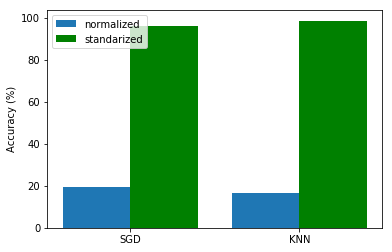

In [266]:
"""
Accuracy (%)
i = 10000
"""
w = 0.4

Y1 = np.array([SGD_norm_ac, KNN_norm_ac])
Y2 = np.array([SGD_std_ac, KNN_std_ac])

X_plt = np.arange(len(Y1))


plt.xticks(X_plt + w/2,  ["SGD",  "KNN"])

plt.bar(X_plt, Y1, width=w, label='normalized', align="center")
plt.bar(X_plt + w, Y2, color='g', width=w, label='standarized', align="center")
plt.legend(loc='upper left')

plt.ylabel("Accuracy (%)")
plt.savefig('/home/AIIDS/pics/Accuracy(%).png', dpi=300)


print(f"SGD_norm Accuracy (%):{SGD_norm_ac}")
print(f"SGD_std Accuracy (%):{SGD_std_ac}")

print(f"KNN_norm Accuracy (%):{KNN_norm_ac}")
print(f"KNN_std Accuracys (%):{KNN_std_ac}")

SGD_norm False Negatives (%):80.75
SGD_std False  Negatives (%):0.77
KNN_norm False  Negatives (%):79.80000000000001
KNN_std False  Negatives (%):0.5


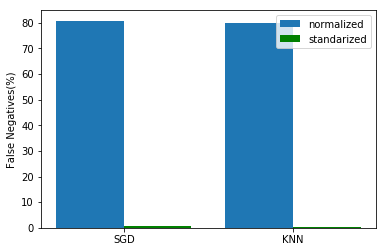

In [267]:
"""
False Negatives(%)
i = 10000
"""
w = 0.4

Y1 = np.array([SGD_norm_fn, KNN_norm_fn])
Y2 = np.array([SGD_std_fn, KNN_std_fn])

X_plt = np.arange(len(Y1))


plt.xticks(X_plt + w/2,  ["SGD",  "KNN"])

plt.bar(X_plt, Y1, width=w, label='normalized', align="center")
plt.bar(X_plt + w, Y2, color='g', width=w, label='standarized', align="center")
plt.legend(loc="best")
#plt.grid(True)
plt.ylabel("False Negatives(%)")

plt.savefig('/home/AIIDS/pics/False Negatives(%).png', dpi=300)

print(f"SGD_norm False Negatives (%):{SGD_norm_fn}")
print(f"SGD_std False  Negatives (%):{SGD_std_fn}")

print(f"KNN_norm False  Negatives (%):{KNN_norm_fn}")
print(f"KNN_std False  Negatives (%):{KNN_std_fn}")

SGD_norm False Positives (%):0.0
SGD_std False Positives (%):3.0300000000000002
KNN_norm False Positives (%):3.5900000000000003
KNN_std False Positives (%):0.9299999999999999


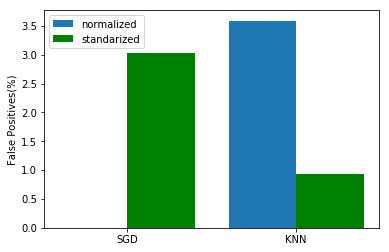

In [268]:
"""
False Positives(%)
i = 10000
"""

w = 0.4

Y1 = np.array([SGD_norm_fp, KNN_norm_fp])
Y2 = np.array([SGD_std_fp, KNN_std_fp])

X_plt = np.arange(len(Y1))


plt.xticks(X_plt + w/2,  ["SGD",  "KNN"])

plt.bar(X_plt, Y1, width=w, label='normalized', align="center")
plt.bar(X_plt + w, Y2, color='g', width=w, label='standarized', align="center")
plt.legend(loc="best")
#plt.grid(True)
plt.ylabel("False Positives(%)")
plt.savefig('/home/AIIDS/pics/False Positives(%).png', dpi=300)


print(f"SGD_norm False Positives (%):{SGD_norm_fp}")
print(f"SGD_std False Positives (%):{SGD_std_fp}")

print(f"KNN_norm False Positives (%):{KNN_norm_fp}")
print(f"KNN_std False Positives (%):{KNN_std_fp}")

SGD_norm Elapsed Times (ms):2.8944828510284424
SGD_std Elapsed Times (ms):1.370295262336731
KNN_norm Elapsed Times (ms):6.468676376342773
KNN_std Elapsed Times (ms):4.702603030204774


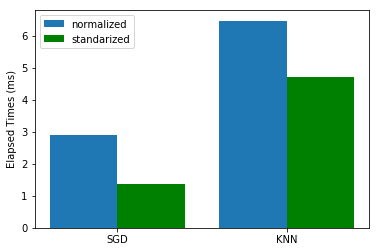

In [269]:
"""
経過時間
i = 10000
"""

w = 0.4

Y1 = np.array([SGD_norm_time, KNN_norm_time])
Y2 = np.array([SGD_std_time, KNN_std_time])

X_plt = np.arange(len(Y1))


plt.xticks(X_plt + w/2,  ["SGD",  "KNN"])

plt.bar(X_plt, Y1, width=w, label='normalized', align="center")
plt.bar(X_plt + w, Y2, color='g', width=w, label='standarized', align="center")
plt.legend(loc="best")
#plt.grid(True)
plt.ylabel("Elapsed Times (ms)")
plt.savefig('/home/AIIDS/pics/Elapsed Times (ms).png', dpi=300)


print(f"SGD_norm Elapsed Times (ms):{SGD_norm_time}")
print(f"SGD_std Elapsed Times (ms):{SGD_std_time}")

print(f"KNN_norm Elapsed Times (ms):{KNN_norm_time}")
print(f"KNN_std Elapsed Times (ms):{KNN_std_time}")

SGD_std False Negatives (%):0.77
KNN_std False Negatives (%):0.5


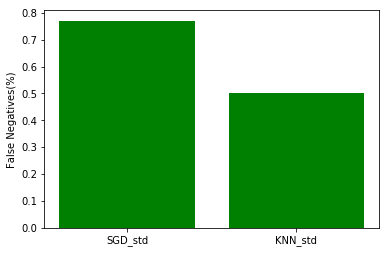

In [270]:
"""
Falsenegatives only std
"""

label_det = [ "SGD_std", "KNN_std"]

height_det = np.array([SGD_std_fn, KNN_std_fn])
X_plt = np.arange(len(height_det))

plt.bar(X_plt, height_det, tick_label=label_det, color='g')

plt.ylabel("False Negatives(%)")

plt.savefig('/home/AIIDS/pics/False Negatives(%) std.png', dpi=300)

print(f"SGD_std False Negatives (%):{SGD_std_fn}")
print(f"KNN_std False Negatives (%):{KNN_std_fn}")

SGD_std Accuracy (%):96.2
KNN_std Accuracy (%):98.57000000000001


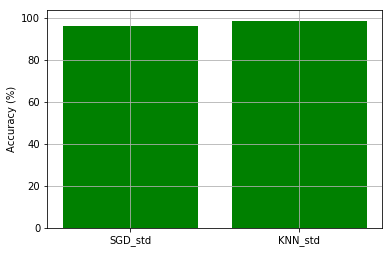

In [271]:
"""
Accuracy only std
"""
label_det = ["SGD_std", "KNN_std"]
left_det = np.array([1, 2])
height_det = np.array([ SGD_std_ac,  KNN_std_ac])
plt.bar(left_det, height_det, tick_label=label_det, color='g')

plt.ylabel("Accuracy (%)")
plt.grid(True)

plt.savefig('/home/AIIDS/pics/Accuracy(%) std.png', dpi=300)

print(f"SGD_std Accuracy (%):{SGD_std_ac}")
print(f"KNN_std Accuracy (%):{KNN_std_ac}")

In [263]:
#ランダムに1行,　予測する

start = time.time() #処理開始時間
random = X_test.sample()
y_pred = knnstd.predict(sc.transform(random))
# 経過時間を表示
elapsed_time = time.time()-start
print(f"経過時間：{elapsed_time}")

print ('Prediction is ' ,end='')
if y_pred[0] == 0:
    print('normal')
else:
    print('attack')
    
if y_pred[0] == y_test[random.index]:
    print('correct')
else:
    print('wrong')

経過時間：0.013225317001342773
Prediction is attack
correct
